<center><font size=10>Inferential Statistics</center></font>
<center><font size=5>Case Study</font></center>





### Business Context

A leading pharmaceutical company has tested five batches of a vaccine. With 300,000 doses already administered, the sixth batch of 60,000 doses needs quality assurance testing for effectiveness and curing time. 
* Previous data shows each dose is twice as likely to be satisfactory as unsatisfactory. This test is to ensure the sixth batch's quality, not a clinical trial.

#### Objective
Analyze random samples from the sixth batch to infer its quality and curing time. Your tasks include:

##### Task 1: Analyze 10 randomly selected doses to determine:

* Probability distribution of unsatisfactory doses
* Probability that exactly 3 out of 10 doses are unsatisfactory
* Probability that at most 3 out of 10 doses are unsatisfactory
* Probability that more than 8 out of 10 doses are satisfactory
##### Task 2: For 20 doses requested by the New York City administration:

* Probability that at least 11 out of 20 doses are unsatisfactory
* Probability that at most 5 out of 20 doses are unsatisfactory
* Probability that at least 13 out of 20 doses are satisfactory
##### Task 3: Analyze the time of effect for 50 doses given to volunteers.
* Probability that the time of effect is less than 11.5 hours
* Probability that the time of effect is more than 10 hours
* Calculate the 90th percentile of the time of effect
* Use dataset doses.csv. The features in the dataset are:
    * drug_serial_number: Unique serial number of a dose
    * time_of_effect: Time taken for the dose to completely cure COVID (in hours):

**Note: A satisfactory dose means it completely cures COVID-19 without side effects.**

# Binomial

### Solution Approach
Let p be the probability that a dose is unsatisfactory. Since a dose is twice as likely to be satisfactory, the probability of a satisfactory dose is 2p.
* According to probability rules:
    * p+2p=1
    * 3p=1
    * p=0.33
* Thus, the probability of a dose being unsatisfactory (success in this context) is 0.33.

## **Import the necessary libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import binom
import scipy.stats as stats

## **Task 1**
* The quality assurance team randomly selected 10 volunteers for a trial, giving each one dose.

* In this setup:
    * Each trial (dose) has two outcomes: satisfactory or unsatisfactory.
    * There are 10 trials, each dose representing one trial.
    * Trials are independent; each dose is given separately.
    * The probability of an unsatisfactory dose is p=0.33.
    * Thus, the number of unsatisfactory doses follows a Binomial distribution with n=10 and p=0.33.

In [26]:
n = 10
p = 0.33
k=np.arange(0,11)

binomial_prob = binom.pmf(k = k,n = n, p = p)
binomial_prob

array([1.82283780e-02, 8.97815635e-02, 1.98993465e-01, 2.61364552e-01,
       2.25280640e-01, 1.33150945e-01, 5.46515074e-02, 1.53816609e-02,
       2.84101573e-03, 3.10956945e-04, 1.53157899e-05])

* Note- pmf: This stands for Probability Mass Function, which gives the probability that a discrete random variable is exactly equal to some value.

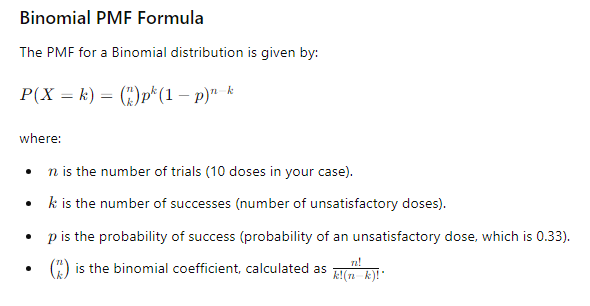

Let us plot the probability distribution of the number of unsatisfactory doses.

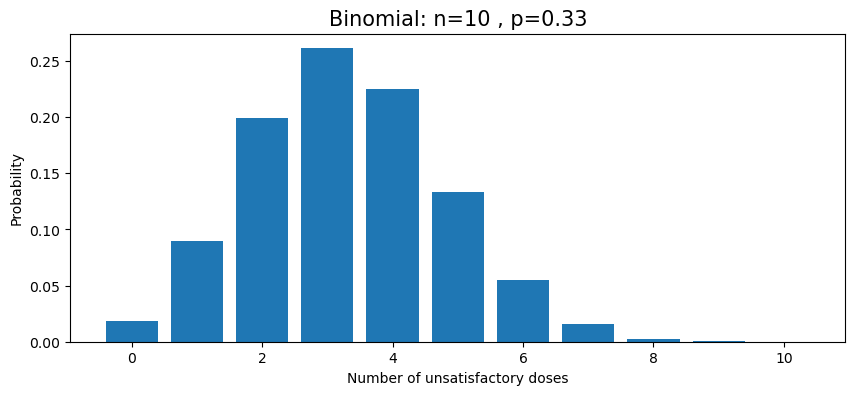

In [14]:
# plot the probability distribution
plt.figure(figsize=(10,4))
plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
plt.show()

The above plot visualizes the mass probabilities for the different number of unsatisfactory doses. We can observe that:
- The mass probability that exactly 3 doses will not do a satisfactory job is comparatively higher than all the other mass probabilities.
- The chances are very low that 9 or 10 doses are unsatisfactory.

### **A) Let us find the probability that exactly 3 doses out of 10 will not do a satisfactory job.**

Suppose $X$ is the random variable that denotes the number of unsuccessful doses. We are to calculate the probability $P(X=3)$.

In [ ]:
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=10 , p=0.33')
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
barl[3].set_color('r')

* In the above graph, the red bar represents $P(X=3)$

* Let's calculate the probability that out of 10 randomly selected doses, exactly 3 will not do a satisfactory job.

* We will use `binom.pmf()` for this.
 * The function `binom.pmf(k,n,p)` calculates the probability $P(X=k)$

In [15]:
# calculate P(X=3) using the pmf function
binom.pmf(k=3,n=n,p=p)

0.2613645515525908

The same result can be obtained by selecting the value at index 3 in the binomial probabilities array

In [13]:
binomial_prob[3]

0.2613645515525908

* The probability that exactly 3 doses out of 10 will not do a satisfactory job is 26.14%.

### **B) Let us find the probability that at most 3 doses out of 10 will not do a satisfactory job.**

We have to calculate the probability $P(X<=3)$.

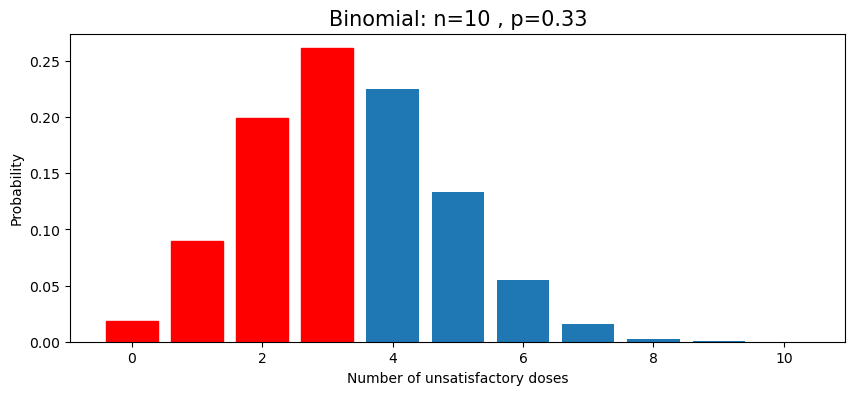

In [18]:
plt.figure(figsize=(10,4))
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(0,4):
    barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents $P(X<=3)$.

* Let's calculate the probability that out of 10 randomly selected doses, at most 3 will not do a satisfactory job.

* We will use `binom.cdf()` for this.
  * The function `binom.cdf(k,n,p)` calculates the probability $P(X<=k)$

In [23]:
sum(binomial_prob[:4])

0.5683679584925132

In [19]:
# calculate P(x<=3) using the cdf function
prob_atmost3 = binom.cdf(k = 3 ,n = n, p = p)
print(prob_atmost3)

0.5683679584925142


*  56.84% is the probability that at most 3 doses out of 10 will not do a satisfactory job.

### **C) Let us find the probability that more than 8 doses out of 10 will do a satisfactory job.**

* If the number of doses that do a satisfactory job is more than 8, then the number of doses that do an unsatisfactory job are less than 2, i.e., the number of doses that do an unsatisfactory job are at most 1.

* So, we need to compute the probability that at most 1 dose does an unsatisfactory job, i.e., $P(X <= 1)$

In [28]:
n = 10
k=np.arange(0,11)
p_satisfactory=1-.33
binomial_prob_satisfactory= binom.pmf(k=k,n=n,p=p_satisfactory)
binomial_prob_satisfactory

array([1.53157899e-05, 3.10956945e-04, 2.84101573e-03, 1.53816609e-02,
       5.46515074e-02, 1.33150945e-01, 2.25280640e-01, 2.61364552e-01,
       1.98993465e-01, 8.97815635e-02, 1.82283780e-02])

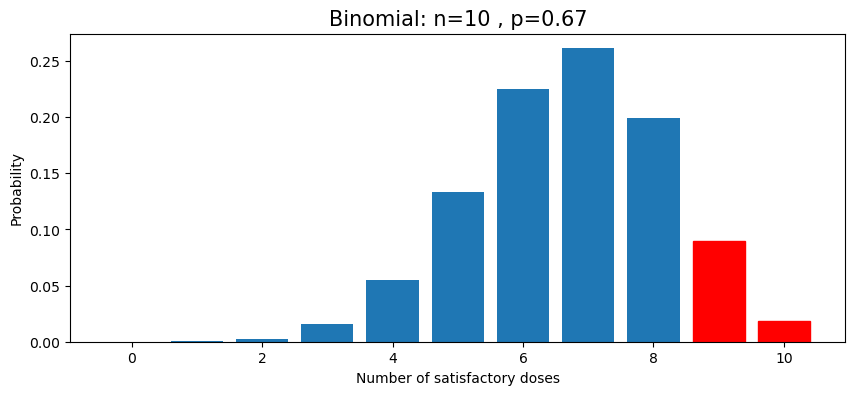

In [39]:
plt.figure(figsize=(10,4))
barl=plt.bar(k,binomial_prob_satisfactory)
plt.title('Binomial: n=%i , p=%.2f' % (n,p_satisfactory), fontsize=15)
plt.xlabel('Number of satisfactory doses')
plt.ylabel('Probability')
barl[9].set_color('r')
barl[10].set_color('r')

* In the above graph, the red region represents $P(X>=8)$.

* Let's calculate the probability that out of 10 randomly selected doses, more than 8 will do a satisfactory job.

* We will use `binom.cdf()` for this.
  * The function `binom.cdf(k,n,p)` calculates the probability $P(X<=k)$

In [33]:
prob_atmost1 = binom.cdf(k=8, n=n, p=1-p)
print(1-prob_atmost1)

0.10800994155329091


*  10.80% is the probability that more than 8 doses out of 10 will do a satisfactory job.

## **Task 2**
* The New York City administration has requested 20 doses for healthcare workers. The Quality Assurance team needs to find the probability of unsatisfactory doses.
* Here, the number of unsatisfactory doses follows a Binomial distribution with parameters 
* n=20 and p=0.33

In [ ]:
n = 20
p = 0.33
k=np.arange(0,21)
k

In [ ]:
from scipy.stats import binom
binomial_prob = binom.pmf(k = k,n = n, p = p)
binomial_prob

### **A) Find the probability that at least 11 doses will not do a satisfactory job out of the 20 doses.**

We are to calculate the probability $P(X>=11)$. It can be obtained using the `cdf` function

In [ ]:
# plot the probability distribution to better visualize the calculations.
# cdf function can be directly used to calculate the probability
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(11,21):
    barl[i].set_color('r')
plt.show()

In the above graph, the red region represents $P(X>=11)$. We can simplify the computation as follows:

$P(X>=11)$

$= 1 - P(X<11)$

$= 1 - P(X<=10)$

Now, we can use `binom.cdf()` for calculating the probability that out of 20 randomly selected doses, at least 11 will not do a satisfactory job.

In [ ]:
sum(binomial_prob[11:])

In [ ]:
# calculate P(x>=11) using cdf function
prob_atleast11 = 1 - binom.cdf(k = 10, n = n, p = p)
print(prob_atleast11)

* There is 3.5 % chance that at least 11 out of 20 doses will not do a satisfactory job

### **B) Find the probability that at most 5 doses out of the 20 will not do a satisfactory job.**

We have to calculate the probability $P(X<=5)$.

In [ ]:
# plot the probability distribution to better visualize the calculations.
# cdf function can be directly used to calculate the probability
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(0,6):
    barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents $P(X<=5)$.

* Let's calculate the probability that out of 20 randomly selected doses, at most 5 will not do a satisfactory job.

* We will use `binom.cdf()` for this.
  * The function `binom.cdf(k,n,p)` calculates the probability $P(X<=k)$

In [ ]:
# calculate the probability P(X<=5) using the pmf function
prob_atmost5 = binom.cdf(k=5, n=n, p=p)
print(prob_atmost5)

*  30.82% is the probability that at most 5 doses out of 20 will not do a satisfactory job.

### **C) Calculate the probability that at least 13 doses out of the 20 will do a satisfactory job**

* If the number of doses that do a satisfactory job at least 13, then the number of doses that do an unsatisfactory job are at most 7, i.e., the number of doses that do an unsatisfactory job are less than or equal to 7.

* So, we need to compute the probability $P(X <= 7)$


In [ ]:
# plot the probability distribution to better visualize the calculations.
# cdf function can be directly used to calculate the probability
barl=plt.bar(k,binomial_prob)
plt.title('Binomial: n=%i , p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of unsatisfactory doses')
plt.ylabel('Probability')
for i in range(0,8):
    barl[i].set_color('r')
plt.show()

* In the above graph, the red region represents $P(X<=7)$.

* Let's calculate the probability that out of 20 randomly selected doses, more than 13 will do a satisfactory job.

* We will use `binom.cdf()` for this.
  * The function `binom.cdf(k,n,p)` calculates the probability $P(X<=k)$

In [ ]:
# calculate the probability P(X<=7) using the cdf function
prob_atmost6 = binom.cdf(k=7, n=n, p=p)
print(prob_atmost6)

*  67.32% is the probability that at least 13 doses out of 20 will do a satisfactory job.

## **Task 3**

The quality assurance team wants to analyze the time of effect for doses. So, they have randomly selected 50 volunteers with the help of the city administration and given one dose to each volunteer. The time of effect of these 50 doses are stored in 'doses.csv' file.

# Normal Distribution

##### Task 3: Analyze the time of effect for 50 doses given to volunteers.
* Probability that the time of effect is less than 11.5 hours
* Probability that the time of effect is more than 10 hours
* Calculate the 90th percentile of the time of effect
* Use dataset doses.csv

### **Reading the Sample Data into the DataFrame**

In [1]:
import pandas as pd
drug = pd.read_csv('doses.csv')
drug.head()

,drug_serial_number,time_of_effect
0,672,5.8
1,895,17.3
2,518,16.7
3,448,13.1
4,402,13.6


In [10]:
len(drug[drug['time_of_effect']<11.5])/len(drug)*100

34.0

### **Overview of the dataset**

In [2]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drug_serial_number  50 non-null     int64  
 1   time_of_effect      50 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 932.0 bytes


There are no null values in the dataset

### **Mean and standard deviation of the time of effect for the sample doses**

In [23]:
# import the required function
from scipy.stats import norm
# estimate the mean and standard deviation of the time of effect for the doses
mu = drug['time_of_effect'].mean()
sigma = drug['time_of_effect'].std()
print('The estimated mean is', round(mu,2))
print('The estimated standard deviation is', round(sigma,2))

The estimated mean is 13.44
The estimated standard deviation is 4.75


### **Plotting the Distribution**



from google.colab import drive
drive.mount('/content/drive')

It will help us analyze the shape of the distribution of time of effect for doses.

<Axes: >

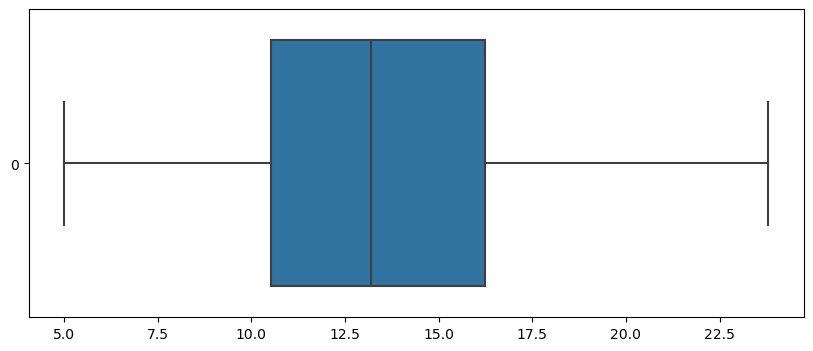

In [14]:
plt.figure(figsize=(10,4))
sns.boxplot(drug['time_of_effect'],orient='h')

C:\Users\ashwani1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='time_of_effect', ylabel='Count'>

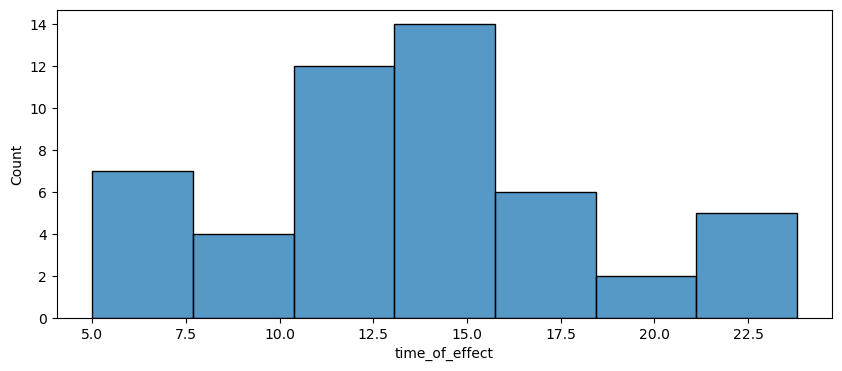

In [15]:
plt.figure(figsize=(10,4))
sns.histplot(drug['time_of_effect'])

C:\Users\ashwani1\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ashwani1\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x400 with 0 Axes>

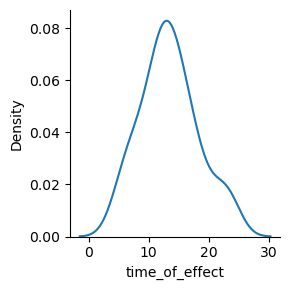

In [18]:
# distribution plot of time of effect
plt.figure(figsize=(10,4))
sns.displot(drug['time_of_effect'],kind="kde",height=3,aspect=1)
plt.show();

* As you can see in the above plot, the shape of the distribution is not perfectly normal because we just have 50 observations in the sample. But, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

In [24]:
drug['time_of_effect'].mean(),drug['time_of_effect'].median()

(13.442, 13.2)

In [21]:
import scipy.stats as stats
stats.norm.cdf(11.5,drug['time_of_effect'].mean(),drug['time_of_effect'].std())

0.3411864031732611

### **A) Find the probability that the time of effect of a dose is less than 11.5 hours**

* Suppose $X$ is the random variable that denotes the time of effect of a dose. We are to calculate $P(X<11.5)$

* Now, for continuous probability distributions

$$P(X<k) = P(X<=k)$$

* We will use `norm.cdf()` to calculate the cumulative probability
  * The function `norm.cdf(x, mu, sigma)` calculates the probability $P(X<x)$ or $P(X<=x)$

In [26]:
# calculate the probability P(X<11.5) using cdf function
prob = norm.cdf(11.5, mu, sigma)
print('The probability that the time of effect of a dose is less than 11.5 is', round(prob, 4))

The probability that the time of effect of a dose is less than 11.5 is 0.3412


* There is 34.12% chance that the time of effect of a randomly selected dose is less than 11.5 hours

### **B) Find the probability that the time of effect of a dose is more than 10 hours.**


* Suppose $X$ is the random variable that denotes the time of effect of a dose. We are to calculate $P(X>10)$

* Now, for continuous probability distributions

$$P(X<k) = P(X<=k)$$

* We first calculate the probability $P(X<=10)$ using the CDF function `norm.cdf()`. Then, we calculate the probability $P(X>10)$ using the complement rule $(1 - P(X<=10))$

* We will use `norm.cdf()` to calculate the cumulative probability
  * The function `norm.cdf(x, mu, sigma)` calculates the probability $P(X<x)$ or $P(X<=x)$

In [27]:
# calculate the probability P(X>10) using cdf function
prob_lessthan10 = norm.cdf(10., mu, sigma)

prob_morethan10 = 1 - prob_lessthan10
print('The probability that the time of effect of a dose is more than 10 is', round(prob_morethan10, 4))

The probability that the time of effect of a dose is more than 10 is 0.7659


In [ ]:
from scipy.stats import norm
norm.cdf(50, 45, 1.7)

In [ ]:
norm.ppf(0.998365, 45, 1.7)

* There is 76.59% chance that the time of effect of a randomly selected dose is more than 10 hours.

### **C) Calculate the 90th percentile of time of effect for the doses**

The `ppf` function is an inverse form of the `cdf` function. Suppose $P(X<=k) = \alpha$, where we are provided the $\alpha$ (probability) value, then we can calculate the value of $k$ using the `ppf` function. This is the Percent Point Function.

In this case, we are to calculate $k$ such that $P(X<=k) = 0.90$. We will use the `ppf()` function for this

* The function `norm.ppf(α, loc, scale)` calculates the value $k$ such that $P(X<=k) = \alpha$

$\mu$

In [28]:
perc_90th = norm.ppf(0.90, mu, sigma)
print('The 90th percentile of the time of effect for doses is', round(perc_90th, 2),'hours')

The 90th percentile of the time of effect for doses is 19.52 hours


* The 90th percentile of the time of effect for doses is 19.52 hours

---

# Uniform Distribution

## Discrete Uniform Distribution

#### Problem statement

The number of books sold by a bookseller per day is given in 'bookseller.csv'.

Let

X = Number of books sold by a bookseller per day

X is a Discrete Random variable (because it represents the book count). Let's see the distribution of X and answer the below questions.


1. Find the probability that more than (or equal to) 96 books will be sold on a given day
2. Find the probability that less than (or equal to) 92 books will be sold on a given day

In [ ]:
book_count = pd.read_csv("bookseller.csv")
book_count.head()

In [ ]:
# visualize the distribution of number of books sold
plt.hist(book_count["Number of Books Sold"], 11, rwidth=0.9, density=True) # plot the histogram
plt.axhline(1 / 11, color="red") # draw a horizontal red line at y = 1/11
plt.xlabel("Number of books sold") # set the x-axis label
plt.ylabel("Density") # set the y-axis label
plt.title("Data Distribution") # set the title
plt.show() # display the plot

##### Insight: As you can see from the above plot that all the values between 90 and 100 are having almost equal probability, you can assume that the number of books sold follows a discrete uniform distribution.

X ~ U(90,100)

In [ ]:
# import the required function
from scipy.stats import uniform

# use the uniform.pmf() function to generate the probability distribution
k = np.arange(90, 101)
probs = uniform.pdf(k, loc=90, scale=11)

**Find the probability that more than 96 books will be sold on a given day**

$ P(X\geq 96)$

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.

barl = plt.bar(k, probs) # make a barplot

for i in range(6, 11):
    barl[i].set_color("r") # color the required bars in red
plt.xlabel("Number of books sold") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Discrete Uniform Distribution: X ~ U(90,100)") # set the title
plt.show() # display the plot

In [ ]:
1 - uniform.cdf(96, loc=90, scale=11)

**Find the probability that less than 92 books will be sold on a given day**


$ P(X\leq 92) $

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
barl = plt.bar(k, probs) # make a barplot

for i in range(0, 3):
    barl[i].set_color("r") # color the required bars in red
plt.xlabel("Number of books sold") # set the x-axis label
plt.ylabel("Probability") # set the y-axis label
plt.title("Discrete Uniform Distribution: X ~ U(90,100)") # set the title
plt.show() # display the plot

In [ ]:
uniform.cdf(93, loc=90, scale=11)

## Continuous Uniform Distribution

### Problem statement


 IT industry records the amount of time a software engineer needs to fix a  bug in the initial phase of software development in 'debugging.csv'.

Let

X = Time needed to fix bugs


X is a continuous random variable. Let's see the distribution of X and answer the below questions.


1. Find the probability that a randomly selected software debugging requires less than three hours

2. Find the probability that a randomly selected software debugging requires more than two hours

3. Find the 50th percentile of the software debugging time


In [ ]:
debugging = pd.read_csv("debugging.csv")
debugging.head()

In [ ]:
# visualize the distribution of the time needed for bug fixing
plt.hist(debugging["Time Taken to fix the bug"], density=True)
plt.axhline(1 / 4, color="red")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

In [ ]:
# Density plot of time taken to fix the bug
sns.displot(debugging["Time Taken to fix the bug"], kde=True)
plt.show()

#### Insight: As you can see from the above plot that all the values between 1 and 5 are having almost equal probability, we are going to use continuous uniform distribution. We need to decide the endpoints. Here, endpoints are 1 and 5.

X ~ U(1, 5)

In [ ]:
# import the required function
from scipy.stats import uniform

# use the uniform.pmf() function to generate the probability distribution
x = np.linspace(1, 5, 50)
probs = uniform.pdf(x, loc=1, scale=4)

#### Find the probability that a randomly selected software debugging requires a maximum time of 3 hours

CDF: of a random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

𝐹𝑋(𝑥)=𝑃(𝑋≤𝑥)
 
In our case, random variable (X) is the number of hours.

𝑃(𝑋≤3)

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
x1 = np.linspace(1, 3, 25)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In [ ]:
uniform.cdf(x=3, loc=1, scale=4)

#### Find the probability that a randomly selected software bug fixing requires more than two hours.

𝑃(𝑋>2)

In [ ]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
x1 = np.linspace(2, 5, 20)
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In [ ]:
1 - uniform.cdf(x=2, loc=1, scale=4)

In [ ]:
uniform.ppf(q=0.5, loc=1, scale=4)

# Poission Distribution

### Problem-1
A call center receives an average of 5 calls per minute. The manager wants to understand the probability of receiving a certain number of calls in a given minute. For example, what is the probability of receiving exactly 7 calls in a minute?

#### Objective
Calculate the probability of receiving exactly 7 calls in a minute and simulate the number of calls received over a 1,000-minute period using the Poisson distribution.

Probability of receiving exactly 7 calls in a minute: 0.1044


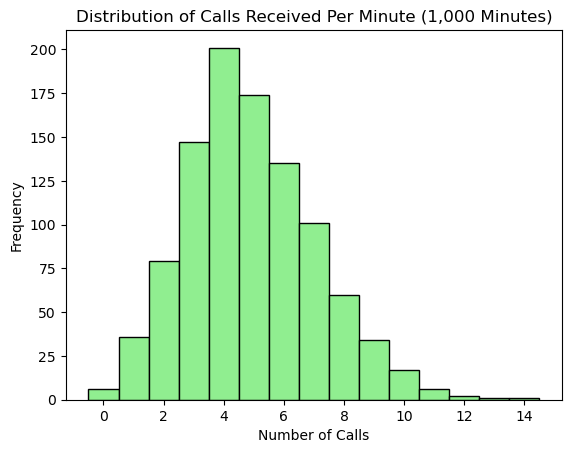

In [43]:
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Parameters for the Poisson distribution
average_calls_per_minute = 5  # Lambda (λ), the average number of calls per minute

# Calculate the probability of receiving exactly 7 calls in a minute
prob_7_calls = poisson.pmf(7, average_calls_per_minute)
print(f"Probability of receiving exactly 7 calls in a minute: {prob_7_calls:.4f}")

# Simulate the number of calls received over 1,000 minutes
calls_received = poisson.rvs(average_calls_per_minute, size=1000)

# Plotting the distribution of calls received
plt.hist(calls_received, bins=range(0, 16), edgecolor='k', color='lightgreen', align='left')
plt.title('Distribution of Calls Received Per Minute (1,000 Minutes)')
plt.xlabel('Number of Calls')
plt.ylabel('Frequency')
plt.show()


### Problem-2
An average of 15 aircrafts accidents occur each year. Compute the following

a)	Mean number of aircraft accidents during a month.

b)	Probability of no accidents during a month.

c)	Probability of exactly one accident during a month.

d)	Probability of more than one accident during a month. 

In [ ]:
rate_per_year=15
rate=rate_per_year/12

In [ ]:
Mean_number_of_aircraft_accidents_during_a_month=rate_per_year/12
Mean_number_of_aircraft_accidents_during_a_month

In [ ]:
n=0
p_b=stats.poisson.cdf(n,rate)
p_b

In [ ]:
n=1
p_c=stats.poisson.pmf(n,rate)
p_c

In [ ]:
n=1
p_=stats.poisson.pmf(n,rate)
p_d=1-p_
p_